In [1]:
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

# Lab 1

## Normal Distribution

The SciPy `sf` (survival function) command calculates the probability of finding a measurement above a given value, i.e. it calculates the integral from the given value to positive infinity. Some of these probabilities are tabulated below for a normal distribution at various sigma values.

In [2]:
for sigma in range(0,6):
    print(f"{sigma} sigma \t {stats.norm.sf(sigma):.2}")

0 sigma 	 0.5
1 sigma 	 0.16
2 sigma 	 0.023
3 sigma 	 0.0013
4 sigma 	 3.2e-05
5 sigma 	 2.9e-07


Similarly, given a probability, we can calculate the corresponding sigma value using the `isf` (inverse survival function) command. This is demonstrated below, again with a normal distribution, for a range of probabilities.

In [3]:
for p in [2, 50, 1000, 3500000]:
    print(f"1 in {p:<2} \t {stats.norm.isf(1/p):.5} sigma")

1 in 2  	 0.0 sigma
1 in 50 	 2.0537 sigma
1 in 1000 	 3.0902 sigma
1 in 3500000 	 5.0006 sigma


In this case, all the sigma values we got were non-negative because we only considered probabilities less than or equal to 0.5. Probabilities greater than 0.5 require us to "catch" more than half of the distribution, which, since the normal distribution is symmetric, require us to be left of the mean, i.e. to have a negative sigma value.

## Rayleigh Distribution

Below we've plotted a a histogram of a population of 100,000 events following a Rayleigh distribution, as well as the corresponding ideal distribution function, on both a linear and log scale.

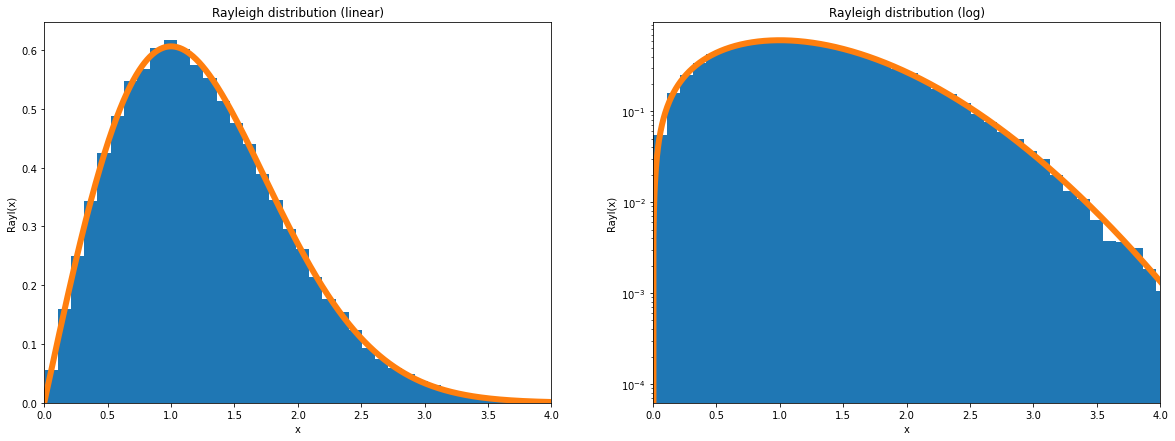

In [4]:
xmin = 0
xmax = 4
x = np.linspace(xmin, xmax, 1000)
d = stats.rayleigh.rvs(size=100000)

fig, axs = plt.subplots(1, 2, figsize=(20,7))
axs[1].set_yscale('log')
axs[0].set_title("Rayleigh distribution (linear)")
axs[1].set_title("Rayleigh distribution (log)")
for ax in axs:
    ax.hist(d, 50, density = True)
    ax.set_xlim([xmin,xmax])
    ax.plot(x, stats.rayleigh.pdf(x), linewidth=6)
    ax.set_xlabel("x")
    ax.set_ylabel("Rayl(x)")
    
plt.show()

Now consider some experiment where the signal-less background is expected to follow the Rayleigh distribution shown above and large values are considered signal-like. Then given a candidate measurement, we are interested in the probability of events as large or larger than the candidate, i.e. we need to calculate the integral of the distribution function from the measurement to positive infinity. This is done for a range of candidate values below, with the equivalent sigma value also listed.

In [5]:
def calculate_prob(measurement):
    prob = stats.rayleigh.sf(measurement)
    sigma = stats.norm.isf(prob)
    print(f"{measurement}: \t {prob*100:<5.3} % \t {sigma:<5.3} sigma")
    
for m in [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]:
    calculate_prob(m)

1.0: 	 60.7  % 	 -0.27 sigma
1.5: 	 32.5  % 	 0.455 sigma
2.0: 	 13.5  % 	 1.1   sigma
2.5: 	 4.39  % 	 1.71  sigma
3.0: 	 1.11  % 	 2.29  sigma
3.5: 	 0.219 % 	 2.85  sigma
4.0: 	 0.0335 % 	 3.4   sigma


## Poisson Distribution

Finally, we consider the Poisson distribution. Below are histograms for randomly generated populations of 100,000 events following Poisson distributions with four different means, as well as plots of the corresponding ideal probability mass functions.

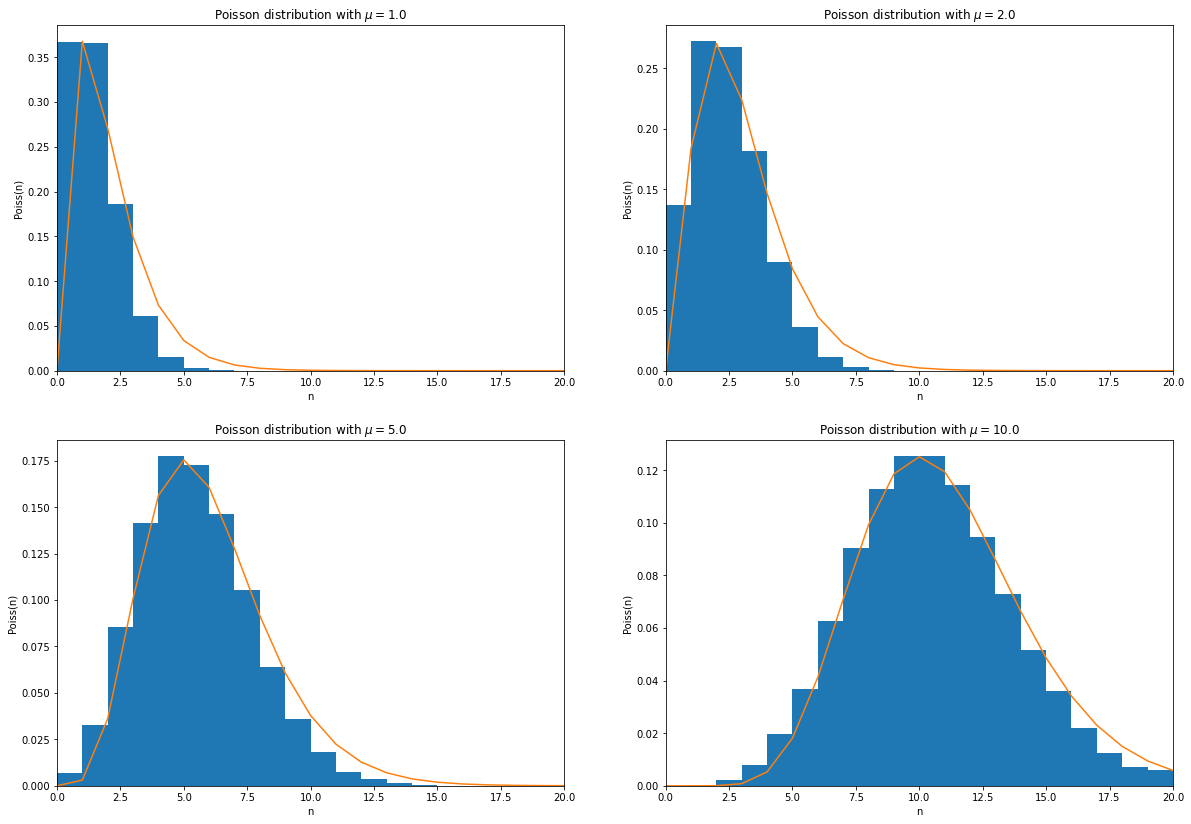

In [6]:
xmin = 0
xmax = 20
x = range(0,xmax+1)

mus = [1.0, 2.0, 5.0, 10.0]

fig, axs = plt.subplots(2,2, figsize=(20,14))
for mu, ax in zip(mus, axs.flatten()):
    d = stats.poisson.rvs(mu, size=100000)
    ax.set_xlim([xmin,xmax])
    ax.hist(d, x, histtype='stepfilled', density=True)
    ax.plot(x, stats.poisson.pmf(mu,x))
    ax.set_xlabel("n")
    ax.set_ylabel("Poiss(n)")
    ax.set_title(f"Poisson distribution with $\mu = {mu}$")

plt.show()

This time, consider an experiment whose background is expected to follow a Poisson distribution with a mean of 5 events, and where observations of a large numbers of are considered signal-like, and suppose we measure 15 events. Again, we are interested in the probability of observing 15 or more events assuming this background distribution, which we calculate below.

In [7]:
measurement = 15
prob = stats.poisson.sf(measurement, 5)
sigma = stats.norm.isf(prob)
print(f"{prob*100:.4} % \t {sigma:.3} sigma")

0.006901 % 	 3.81 sigma


The Poisson and similar distributions are discrete in the sense that they describe measurements which take discrete values, for instance the number of observed events. However, the probabilities themselves can take any value, as can properties of the distribution like the mean. This is why the parameters to discrete distributions need not be discrete. The possible measured values described by the distribution always remain fixed and discrete, but the probability of each such value as well and the modes of the distribution can vary continuously with the parameters. 